In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Analysis of stat

In [3]:
stat_df1 = pd.read_csv('../result/experiments_1_2/stat_mle_RQ.csv')
stat_df1['best_start'] = False
stat_df2 = pd.read_csv('../result/experiments_1_2/stat_RQ_best_start.csv')
stat_df2['best_start'] = True
stat_df = pd.concat([stat_df1, stat_df2])
stat_df

,quantile,model,method,trial,loss,hit_rate_in,hit_rate_out,dq_in,dq_out,binom_in,binom_out,traffic_in,traffic_out,kupiec_in,kupiec_out,independent_in,independent_out,best_start
0,0.05,adaptive,numeric,0,0.128174,0.048515,0.044956,0.618034,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971,False
1,0.05,adaptive,numeric,1,0.128174,0.048515,0.044956,0.618023,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971,False
2,0.05,adaptive,numeric,2,0.128174,0.048515,0.044956,0.618006,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971,False
3,0.05,adaptive,numeric,3,0.128174,0.048515,0.044956,0.618006,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971,False
4,0.05,adaptive,numeric,4,0.128174,0.048515,0.044956,0.617985,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.01,igarch,numeric,25,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.0,1.0,0.992732,0.676898,True
236,0.01,igarch,numeric,26,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.0,1.0,0.992732,0.676898,True
237,0.01,igarch,numeric,27,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.0,1.0,0.992732,0.676898,True
238,0.01,igarch,numeric,28,0.034215,0.010074,0.013158,1.000000,0.992330,0.934696,0.192984,green,green,1.0,1.0,0.993802,0.676898,True


In [4]:
stat_to_csv_df = {
    'model': [],
    'quantile': [],
    'loss': [],
    'random\'s loss': [],
    'best\'s loss': [],
    'hit_rate_in': [],
    'random\'s hit_rate_in': [],
    'best\'s hit_rate_in': [],
    'hit_rate_out': [],
    'random\'s hit_rate_out': [],
    'best\'s hit_rate_out': [],
}

keys = [key for key in stat_to_csv_df][2:]

for q in stat_df['quantile'].unique():
    for mod in stat_df['model'].unique():
        cond1 = stat_df['quantile']==q
        cond2 = stat_df['model']==mod
        
        stat_to_csv_df['model'].append(mod)
        stat_to_csv_df['quantile'].append(q)
        
        for i, metric in enumerate(stat_df.columns[4:7]):
            try:
                x = stat_df[(stat_df['method']=='numeric')&(stat_df['best_start']==False)&cond1&cond2][metric]
                y = stat_df[(stat_df['method']=='numeric')&(stat_df['best_start']==True)&cond1&cond2][metric]
                if metric=='loss':
                    print('loss:', x.mean() < y.mean())
                if metric=='hit_rate_in':
                    print('hit_rate_in:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                if metric=='hit_rate_out':
                    print('hit_rate_out:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                stat_to_csv_df[keys[i*3]].append('accepted' if mannwhitneyu(x, y)[1] > 0.05 else 'rejected')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))
            except:
                # they are exactly the same 
                stat_to_csv_df[keys[i*3]].append('accepted')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))

loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: True
hit_rate_out: True
loss: False
hit_rate_in: True
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: True
hit_rate_out: False


In [5]:
pd.DataFrame(stat_to_csv_df).T.to_csv('../result/experiments_1_2/stat_RQ_best_start_analysis_res.csv')
pd.DataFrame(stat_to_csv_df).T

,0,1,2,3,4,5,6,7
model,adaptive,symmetric,asymmetric,igarch,adaptive,symmetric,asymmetric,igarch
quantile,0.05,0.05,0.05,0.05,0.01,0.01,0.01,0.01
loss,accepted,rejected,rejected,rejected,rejected,rejected,rejected,accepted
random's loss,0.130347,0.126727,0.12414,0.12625,0.039905,0.034448,0.033489,0.034221
best's loss,0.128174,0.126727,0.124139,0.126249,0.038675,0.034448,0.033471,0.034215
hit_rate_in,accepted,accepted,accepted,accepted,rejected,accepted,accepted,accepted
random's hit_rate_in,0.047526,0.050124,0.050247,0.050256,0.009288,0.010065,0.010074,0.010322
best's hit_rate_in,0.048515,0.050124,0.050203,0.050203,0.008952,0.010039,0.010074,0.010277
hit_rate_out,accepted,accepted,rejected,accepted,rejected,accepted,rejected,accepted
random's hit_rate_out,0.042361,0.039474,0.036824,0.04057,0.009923,0.015351,0.014839,0.012975


# Analysis of beta

In [7]:
beta_df1 = pd.read_csv('../result/experiments_1_2/beta_mle_RQ.csv')
beta_df1['best_start'] = False
beta_df2 = pd.read_csv('../result/experiments_1_2/beta_RQ_best_start.csv')
beta_df2['best_start'] = True
beta_df = pd.concat([beta_df1, beta_df2])
beta_df

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial,best_start
0,beta1,-0.655107,0.041220,3.540696e-57,0.05,adaptive,numeric,0,False
1,beta1,-0.655127,0.041243,4.044742e-57,0.05,adaptive,numeric,1,False
2,beta1,-0.655156,0.041276,4.917020e-57,0.05,adaptive,numeric,2,False
3,beta1,-0.655156,0.041277,4.924863e-57,0.05,adaptive,numeric,3,False
4,beta1,-0.655193,0.041319,6.301294e-57,0.05,adaptive,numeric,4,False
...,...,...,...,...,...,...,...,...,...
655,beta2,0.880204,0.029761,1.529119e-192,0.01,igarch,numeric,28,True
656,beta3,0.567895,0.212448,3.757687e-03,0.01,igarch,numeric,28,True
657,beta1,0.247952,0.083566,1.502875e-03,0.01,igarch,numeric,29,True
658,beta2,0.884276,0.029021,3.281446e-204,0.01,igarch,numeric,29,True


beta1 0.022573104190397528


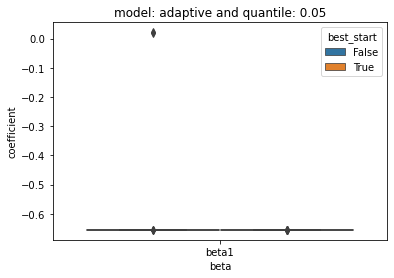

beta1 0.15208840900985182


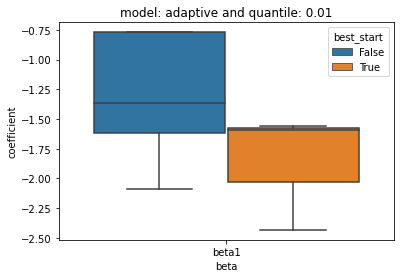

beta1 0.022573104190397528
beta2 0.030725955505628493
beta3 0.0297139575844762


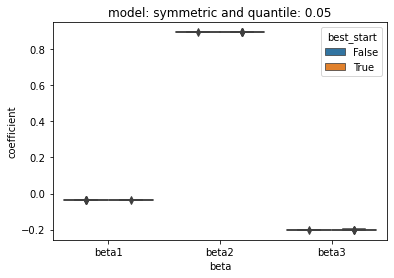

beta1 0.15208840900985182
beta2 0.2896471052909906
beta3 0.3050037760188406


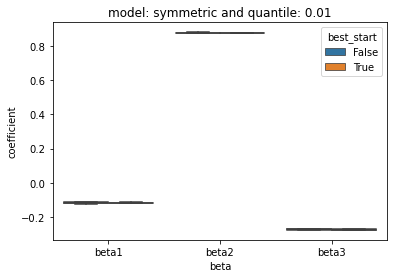

beta1 0.022573104190397528
beta2 0.030725955505628493
beta3 0.0297139575844762
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


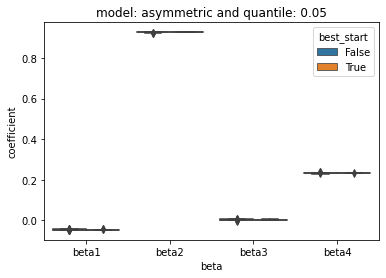

beta1 0.15208840900985182
beta2 0.2896471052909906
beta3 0.3050037760188406
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


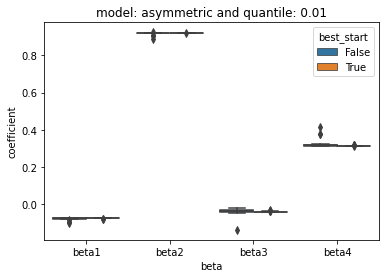

beta1 0.022573104190397528
beta2 0.030725955505628493
beta3 0.0297139575844762


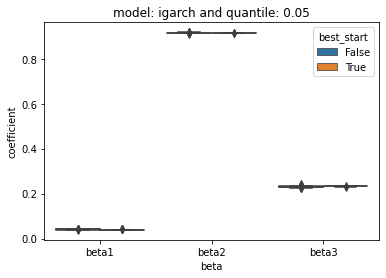

beta1 0.15208840900985182
beta2 0.2896471052909906
beta3 0.3050037760188406


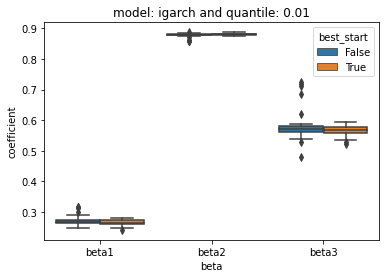

In [8]:
for model in beta_df.model.unique():
    for q in beta_df['quantile'].unique():
        plt.figure()
        sns.boxplot(
            data=beta_df[(beta_df['model']==model)&(beta_df['quantile']==q)&(beta_df['method']=='numeric')],
            x='beta',
            y='coefficient',
            hue='best_start'
        )
        cond1 = beta_df['quantile']==q
        cond2 = beta_df['model']==mod
        plt.title(f'model: {model} and quantile: {q}')
        for beta in beta_df[beta_df['model']==model].beta.unique():
            cond3 = beta_df['beta']==beta
            x = beta_df[(beta_df['method']=='numeric')&(beta_df['best_start']==True)&cond1&cond2&cond3]['coefficient']
            y = beta_df[(beta_df['method']=='numeric')&(beta_df['best_start']==False)&cond1&cond2&cond3]['coefficient']
            print(beta, mannwhitneyu(x, y)[1])        
        plt.show()

In [9]:
beta_df[beta_df['method']=='numeric'].groupby(
    ['model','quantile','beta','best_start']
).mean()

coefficient  S.E. of beta  \
model      quantile beta  best_start                              
adaptive   0.01     beta1 False         -1.306247      0.077366   
                          True          -1.771917      0.007383   
           0.05     beta1 False         -0.610099      0.038721   
                          True          -0.655155      0.041275   
asymmetric 0.01     beta1 False         -0.077498      0.012323   
                          True          -0.074280      0.011132   
                    beta2 False          0.919018      0.011027   
                          True           0.921241      0.009030   
                    beta3 False         -0.038000      0.056480   
                          True          -0.039139      0.053919   
                    beta4 False          0.324960      0.043749   
                          True           0.314895      0.034135   
           0.05     beta1 False         -0.045780      0.009861   
                          True          -0.045739      0.009810   
                    beta2 False          0.926216      0.022909   
                          True           0.926441      0.022994   
                    beta3 False          0.003101      0.051494   
                          True           0.003369      0.051637   
                    beta4 False          0.231688      0.070189   
                          True           0.231145      0.070338   
igarch     0.01     beta1 False          0.272645      0.090626   
                          True           0.265364      0.088905   
                    beta2 False          0.877405      0.037214   
                          True           0.880091      0.034103   
                    beta3 False          0.584280      0.281365   
                          True           0.566952      0.250336   
           0.05     beta1 False          0.040581      0.024618   
                          True           0.040198      0.024978   
                    beta2 False          0.915174      0.014833   
                          True           0.914972      0.014460   
                    beta3 False          0.231114      0.033764   
                          True           0.231735      0.030558   
symmetric  0.01     beta1 False         -0.116499      0.023694   
                          True          -0.118824      0.024253   
                    beta2 False          0.878439      0.013292   
                          True           0.877067      0.013593   
                    beta3 False         -0.272716      0.024940   
                          True          -0.274555      0.025406   
           0.05     beta1 False         -0.037353      0.046204   
                          True          -0.037341      0.045963   
                    beta2 False          0.894354      0.055786   
                          True           0.894560      0.055064   
                    beta3 False         -0.200235      0.072381   
                          True          -0.199794      0.071014   

                                       pval of beta  trial  
model      quantile beta  best_start                        
adaptive   0.01     beta1 False        2.329901e-11   14.5  
                          True         0.000000e+00   14.5  
           0.05     beta1 False        9.035206e-08   14.5  
                          True         4.888142e-57   14.5  
asymmetric 0.01     beta1 False        8.177990e-06   14.5  
                          True         1.499535e-11   14.5  
                    beta2 False       4.184197e-124   14.5  
                          True         0.000000e+00   14.5  
                    beta3 False        2.592285e-01   14.5  
                          True         2.342330e-01   14.5  
                    beta4 False        3.823406e-04   14.5  
                          True         2.702948e-20   14.5  
           0.05     beta1 False        1.804008e-06   14.5  
                          True         1